# Challenge 2

URRUTY Antonin et RUEFF Arnaud

### 1) Random walk avec terme de deplacemment :

Dans le cadre du modèle d'évolution de la position des molécules de colorant dans de l'eau, le déplacemment  $$ds=cdt+\sqrt{2\alpha}\mathcal{N(0,1)}=x(t+dt)-x(t)$$ modélise les collisions sucessives des molécules de colorant avec les molécules d'eau ; ce qui entraine un processus diffusif ayant même constante de diffusion $\alpha$ que dans l'expression du deplacemment.
Le terme $\mathcal{N(0,1)}$ represente les collisions aleatoires (nombre aleatoire généré par une fonction de distribution normale centrée réduite) , et le terme $cdt$ un deplacemment forcé.
Nous allons verifié si l'evolution de la densité $\rho(x,t)$ est bien decrite par l'equation de diffusion :
$$\frac{\partial \rho}{\partial t}= \alpha \frac{\partial^2 \rho}{\partial x^2}$$
ayant pour solution 
$$\rho(x,t)=\frac{1}{\sqrt{2\pi \sigma_t^2}}\exp{\frac{-(x-\mu)^2}{2\sigma_t^2}}$$
La position initiale $x_0$ sera egalement donné par une distribution centrée réduite. 

* #### Librairies 

In [14]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

* #### Condition initiale et histogramme 

Ci desssous, la distribution gaussienne initiales de la position des molécules :

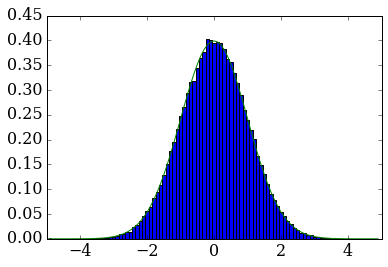

In [28]:
npart=100000
mu=0
sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart) #Position initiale defini par distribution normale "built-in"
                                                        

# Creation de bins centré autour de 0
binwidth=0.1
bins=numpy.arange(-5,5,binwidth)
bins = bins + binwidth/2

# Centre de Bins
bin_centers = bins[:-1]+binwidth/2

# Histogramme et distribution attendue
pyplot.xlim(-5,5)
pyplot.hist(x0,bins,normed=True);
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigma**2))/numpy.sqrt(2*numpy.pi*sigma**2))

* #### Simulation avec terme dynamique en plus 

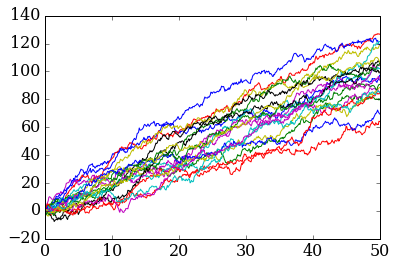

In [29]:
#Temps de simulation
T=50.0
nt=500
dt=T/nt

#Parametres
alpha=4.0
c=2

t = numpy.arange(0,T+dt,dt)
xn = numpy.empty([nt+1,npart])

xn[0]=x0

#Random walk avec terme dynamique
for i in range(nt):
    xn[i+1]=xn[i]+c*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

for i in range(20):
    pyplot.plot(t,xn[:,i])

* #### Analyse du random walk 

Premièrement, remarquons que la modélisation de ce Random walk modélise bien un processus de diffusion, en effet lorsqu'on diminue alpha (coefficient de diffusion), l'étalemment de la position des molécules est moindre (exemple avec $\alpha=0.2$) :

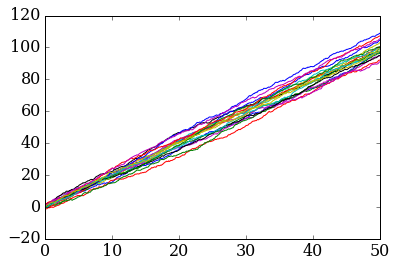

In [30]:
#Nouveaux parametres de test
alpha=0.2
c=2

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+c*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

for i in range(20):
    pyplot.plot(t,x[:,i])

De plus, $c$ est manifestemment un terme de déplacemment ; en effet si on prend $c$ grand pour le même $\alpha=4$ que précedemment, on voit que la diffusion n'a pas le temps de ce faire a cause de la haute vitesse de déplacemment $c$ : 

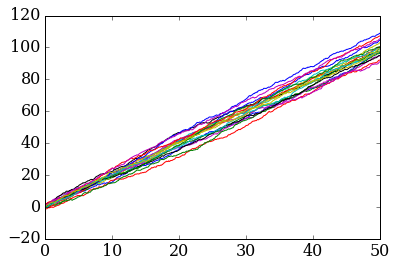

In [34]:
#Nouveaux parametres de test
alpha=4.0
c=10 #Precedemment on avait c=2

for i in range(20):
    pyplot.plot(t,x[:,i])

* #### Comparaison avec la solution Gaussienne de l'équation de diffusion :

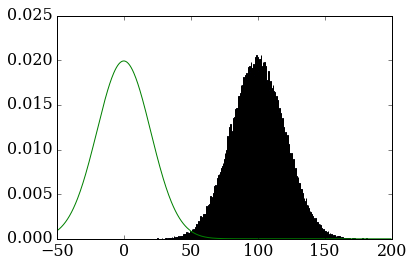

In [35]:
# Bins centré en 0 et paramètres initiaux
binwidth=0.5
bins=numpy.arange(-50,200,binwidth)
bins = bins + binwidth*0.5
alpha=4.
c=2
# Bins center
bin_centers = bins[:-1]+binwidth/2

# Creation d'un histogramme pour le random walk

pyplot.hist(xn[nt],bins,normed=True);

# Distribution theorique attendue
sigmat2=2*alpha*T+sigma**2
pyplot.plot(bin_centers, numpy.exp(-(bin_centers)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))


On remarque que le nouveau random walk ne colle plus avec la distribution gaussienne initiale

$$\rho(x,t)=\frac{1}{\sqrt{2\pi \sigma_t^2}}\exp{\frac{-(x-\mu)^2}{2\sigma_t^2}}$$

qui était solution de l'équation de diffusion régissant l'évolution de la densité :

$$\frac{\partial \rho}{\partial t}= \alpha \frac{\partial^2 \rho}{\partial x^2}$$

En fait, on devine que la nouvelle solution est toujours la même distribution que précedemment mais dont la moyenne a evoluée avec le temps (ce qui montre bien la contribution du terme de déplacemment) !
Il ferait sens que la moyenne $\mu$ soit telle que $$\mu=cT$$  Voyons ce que sa donne.

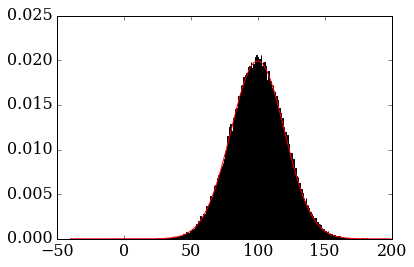

In [36]:
binwidth=0.5
bins=numpy.arange(-40,200,binwidth)
bins = bins + binwidth*0.5
alpha=4.
bin_centers = bins[:-1]+binwidth/2

# Histogramme du random walk

pyplot.hist(xn[nt],bins,normed=True,color="blue");

# Verification de la nouvelle distribution avec mu=c*T
sigmat2=2*alpha*T+sigma**2
pyplot.plot(bin_centers, numpy.exp(-(bin_centers-c*T)**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2),color="red")

Sa fonctionne ! Ainsi, dans le cas du random walk ou le deplacemment est donné par 

$$ds=cdt+\sqrt{2\alpha dt}\mathcal{N(0,1)}$$

on remarque que l'evolution de la densité est donné par la même équation de diffusion

$$\frac{\partial \rho}{\partial t}=\alpha \frac{\partial^2 \rho}{\partial x^2}$$

ayant pour solution commune

$$\rho(x,t)=\frac{1}{\sqrt{2\pi \sigma_t^2}}\exp\left(\frac{-(x-\mu_t)^2}{2\sigma_t^2}\right)$$

a la différence que $\mu$ dépend du temps : $\mu=ct$ 


### 2) Random walk avec friction :

Dans le cas d'un déplacemment $ds$ tel que 
$$ds=-\gamma xdt+ \sqrt{2\alpha dt}\mathcal{N(0,1)}=x(t+dt)-x(t)$$

qui modélise des collisions aléatoires avec un terme de friction, on peut montrer que la solution éxacte pour l'évolution de la densité dans ce cas est donné par :


$$ \rho(x,t)=\frac{1}{\sqrt{\frac{4\pi \alpha}{\gamma}(1-e^{-2\gamma t})}}exp\left({-\gamma\frac{(x-e^{-\gamma t}x_0)^2}{4\alpha}}(1-e^{-2\gamma t})\right)$$

ou la position initiale $x_0$ est distribuée de la meme manière que précédemment.

Remarquons que, lorsque $t\rightarrow \infty$ , la densité tends vers :
$$ \rho(x,t)=\frac{1}{\sqrt{4\pi\alpha/\gamma}}exp\left(\frac{-x^2}{4\alpha/\gamma}\right) $$

qui est a nouveau une distribution normale de moyenne $\mu=0$ et d'ecart type $\sigma=2\alpha/\gamma$.

Vérifions si on a bien cette evolution pour la densité pour un deplacemment avec friction :

In [25]:
# Conditions initiales
npart = 10000
mu = 0.
sigma = 1.

# Temps de simulation
T = 15000
nt = 5000
dt = T/nt

# Parametres du systeme
alpha = 2.
gamma = 0.4



In [22]:
# Boucle pour Random walk avec friction 
xm = numpy.empty([nt+1,npart])
x0 = numpy.random.normal(0,1,npart)
xm[0]=x0

for i in range(nt):
    xm[i+1]=xm[i]- gamma*xm[i]*dt + \
            numpy.sqrt(2*alpha*dt)*numpy.random.normal(0, 1, npart)


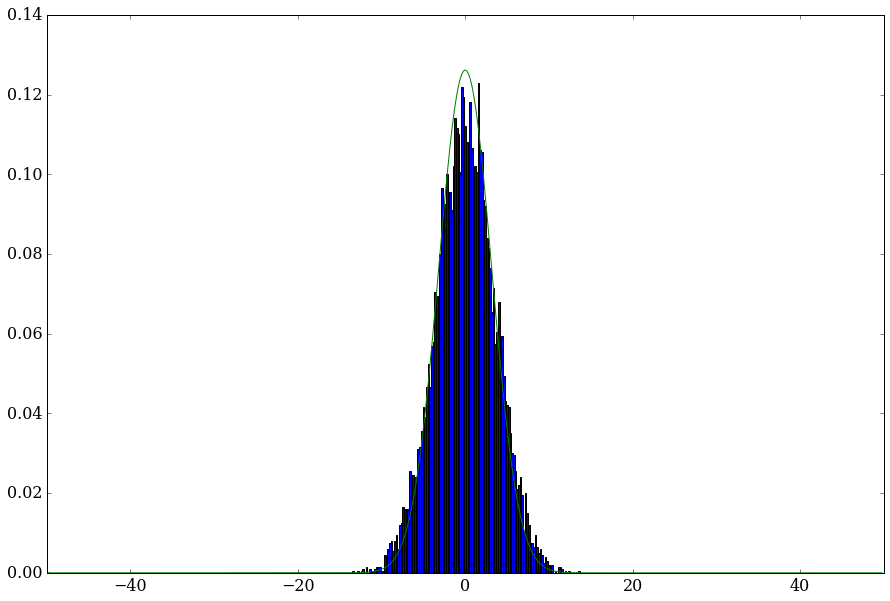

In [26]:
# Histogramme du Random qalk avec friction
pyplot.figure(figsize=(15, 10))
pyplot.xlim(-50, 50)
bins = numpy.arange(-50, 50, binwidth)
binwidth = 0.2
bins = bins + binwidth/2


pyplot.hist(xm[nt], bins, normed=True);



# Distribution theorique attendue apres un temps infini
mut = mu
sigmat2 = 2*alpha/gamma

bin_centers = bins[:-1] + binwidth/2
pyplot.plot(bin_centers, \
    numpy.exp(-(bin_centers - mut)**2/(2*sigmat2)) * \
    1/numpy.sqrt(2*numpy.pi*sigmat2))

On remarque que les deux distributions sont proches ! Si on pouvait augmenter le temps indéfiniment, elles seraient pareilles. Le processus de diffusion est ainsi toujours le même, mais prends bien plus de temps a se faire a cause de la friction des molécules entres elles !